# Chapter 4. 그래프 그리기

판다스를 활용한 데이터 시각화를 알아보자. 목차는 다음과 같다. 

 - 4-1 데이터시각화가 필요한 이유
 - 4-2 matplotlib라이브러리 자유자재로 사용하기 
 - 4-3 seaborn라이브러리 자유자재로 사용하기
 - 4-4 데이터프레임과 시리즈로 그래프 그리기
 - 4-5 seaborn라이브러리로 그래프 스타일 설정하기

## 4-1 데이터 시각화가 필요한 이유

### 앤스콤 4분할 그래프 살펴보기
데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프가 있다. 이 그래프는 프랭크 앤스콤이 데이터를 시각화하지 않고 수치만 확인할 대 발생할 수 있는 함정을 보여주기 위해 만든 그래프인데, 이를 알아보자.

#### 앤스콤이 지적한 함정과 데이터 시각화의 필요성
앤스콤 4분할 그래프를 구정하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x,y열을 가지고 있다. 그런데 이 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있다. 그래서 이런 결과만 보고 "데이터 그룹 1,2,3,4의 데이터는 모두 같을것이다"라고 착각할 수 있다. 바로 이 것이 앤스콤이 지적한 함정이다. 하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 데이터 패턴을 가지고 있다는 검을 금방 알 수 있다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있다. 그러면 데이터 시각화란 무엇인지 직접 실습하며 알아보도록 하자.

### 앤스콤 데이터 집합 불러온 후 그래프 생성

#### 1. 앤스콤 데이터 집합 불러오기
앤스콤 데이터 집합은 seaborn 라이브러리에 포암되어 있다. seaborn 라이브러리의 load_dataset 메서드에 문자열 anscombe를 전달하면 앤스콤 데이터 집합을 불러올 수 있다. 이때 데이터 프레임의 열 이름중 dataset열이 데이터 그룹을 구분한다는 것을 알 수 있다.

In [8]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

#### 2. matplotlib 라이브러리로 그래프 그리기
데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 된다. matplotlib 라이브러리를 사용해서 불러오도록 하자.

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

#### 3. 
다음은 anscombe 데이터프레임의 datset 열에서 데이터 값이 1인 것만 추출한 것이다. 

In [10]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

#### 4. 
선 그래프는 plot 메서드로 그리자. plot 메서드의 x,y축 데이터를 전달하면 선 그래프가 나타나게 된다. 앞에서 준비한 dataset_1의 x,y열을 전달 하자.

<IPython.core.display.Javascript object>


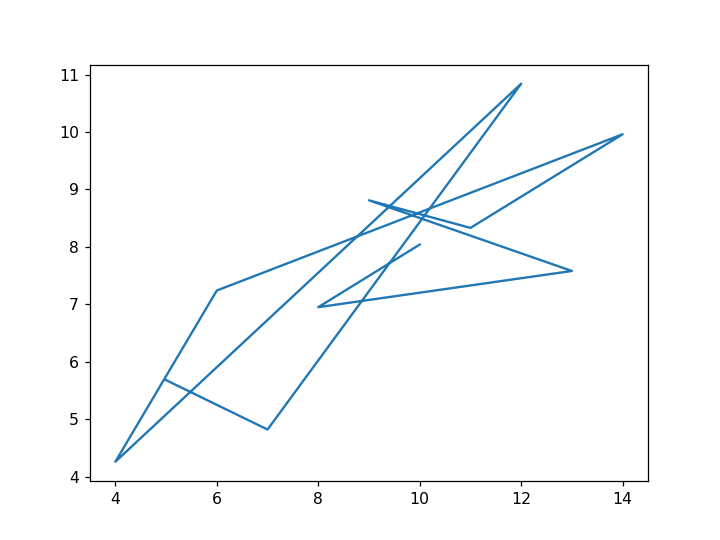

In [11]:
plt.plot(dataset_1['x'], dataset_1['y'])

#### 5. 